Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Easy_Risk_Kit as erk

ind = erk.get_ind_returns()
er=erk.annualized_rets(ind["1996":"2000"],12)

cov=ind["1996":"2000"].cov()

In [3]:
def portfolio_return(weights, returns):
    return weights.T@ returns

def portfolio_vol(weights, covmat):
    retunr (weights.T@ covmat@ weights)**0.5 # variance then **0.5 to get volatility
    



In [11]:
l=["Food","Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [12]:
cov.loc[l, l] #.loc give us the index location by integer

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [15]:
import numpy as np
weights=np.repeat(1/4, 4)
erk.portfolio_return(weights, er[l] )


0.19511097196038385

In [17]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

Asset Frontier

In [18]:
l=["Games","Fin"]

In [21]:
n_points = 20
weights=[np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [22]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [23]:
len(weights)

20

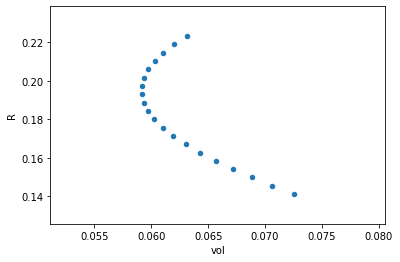

In [38]:
rets=[erk.portfolio_return(w, er[l])for w in weights]
vols=[erk.portfolio_vol(w, cov.loc[l,l])for w in weights]
import pandas as pd
ef=pd.DataFrame({"R":rets, "vol":vols})
ef.plot.scatter(x="vol", y="R")

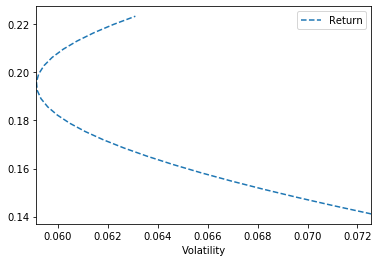

In [37]:
l=["Fin","Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l], style="--")